In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.datasets import load_digits
%matplotlib inline

digit=load_digits()           ##importing datasets
p=digit.data
q=digit.target
p.shape, q.shape

((1797, 64), (1797,))

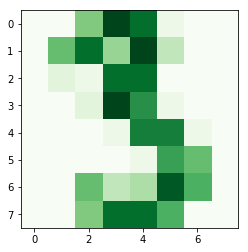

In [2]:
plt.imshow(p[3].reshape(8,8),cmap=plt.cm.Greens)

In [3]:
df1=pd.DataFrame(p)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
df2=pd.DataFrame(q)
df2.head()

,0
0,0
1,1
2,2
3,3
4,4


In [5]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.4)
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(p_train,q_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
pred=reg.predict(p_test)
result=pd.DataFrame({"Predicted":pred,"Actual":q_test})
result

,Predicted,Actual
0,9,9
1,4,4
2,2,2
3,9,9
4,8,8
5,5,5
6,2,2
7,9,9
8,8,8
9,4,4


In [7]:
reg.score(p_test,q_test)*100

94.57579972183588

In [8]:
kfold=model_selection.KFold(n_splits=10,random_state=7)
results=model_selection.cross_val_score(reg,p,q,cv=kfold,scoring="accuracy")      
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [9]:
results.sum()/10

0.931530105524519

In [10]:
results=model_selection.cross_val_score(reg,p,q,cv=kfold,scoring="neg_log_loss")
results

array([-0.45798961, -0.14435058, -0.61749705, -0.27323142, -0.27594697,
       -0.12815811, -0.11024468, -0.1233365 , -0.62592303, -0.68553964])

In [11]:
results.sum()/10

-0.3442217575018163

In [12]:
results=model_selection.cross_val_score(reg,p,q,cv=kfold,scoring="r2")
results

array([0.73184699, 0.86942354, 0.81023661, 0.79423609, 0.82434177,
       0.94343263, 0.92524112, 0.90725247, 0.60169024, 0.82555495])

In [13]:
results.sum()/10

0.8233256404108781

In [14]:
from sklearn import metrics
print(metrics.mean_absolute_error(q_test,pred))

0.2267037552155772


In [15]:
print(metrics.mean_squared_error(q_test,pred))

1.1641168289290682


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(q_test,pred)

array([[70,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 75,  0,  1,  0,  1,  0,  0,  1,  1],
       [ 0,  0, 59,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 64,  0,  1,  0,  1,  3,  1],
       [ 0,  2,  0,  0, 71,  0,  0,  0,  2,  1],
       [ 0,  1,  0,  1,  0, 73,  0,  0,  0,  6],
       [ 1,  1,  0,  0,  0,  1, 68,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 75,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  1,  0, 57,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 68]], dtype=int64)

In [17]:
print(classification_report(q_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99        70
          1       0.89      0.95      0.92        79
          2       1.00      0.97      0.98        61
          3       0.96      0.91      0.93        70
          4       0.97      0.93      0.95        76
          5       0.96      0.90      0.93        81
          6       0.99      0.96      0.97        71
          7       0.99      0.97      0.98        77
          8       0.88      0.89      0.88        64
          9       0.86      0.97      0.91        70

avg / total       0.95      0.95      0.95       719



In [18]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(p_train,q_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
pred=model.predict(p_test)
results=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="accuracy")
results

array([0.92777778, 0.98888889, 0.98888889, 0.97777778, 0.96111111,
       0.97777778, 0.98888889, 0.98324022, 0.98324022, 0.96089385])

In [20]:
results.sum()/10

0.9738485412787089

In [21]:
print(classification_report(q_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        70
          1       0.94      1.00      0.97        79
          2       0.97      1.00      0.98        61
          3       0.98      0.93      0.96        70
          4       0.99      0.97      0.98        76
          5       0.99      0.96      0.97        81
          6       1.00      0.99      0.99        71
          7       0.96      1.00      0.98        77
          8       0.95      0.92      0.94        64
          9       0.94      0.96      0.95        70

avg / total       0.97      0.97      0.97       719

